<a href="https://colab.research.google.com/github/Kiriyamarei010/Emotional-Analysis/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install text_hammer
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.11.2
    Uninstalling beautifulsoup4-4.11.2:
      Successfully uninstalled beautifulsoup4-4.11.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yfinance 0.2.32 requires beautifulsoup4>=4.11.1, but you have beautifulsoup4 4.9.1 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import text_hammer as th
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from transformers import AutoTokenizer,TFBertModel
from transformers import BertTokenizer, TFBertModel, BertConfig,TFDistilBertModel,DistilBertTokenizer,DistilBertConfig
import shutil
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False # if autocompletion doesnot work in kaggle notebook | hit tab

In [ ]:
df = pd.read_csv('Emotion_final.csv')
df

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


# New Section

In [ ]:
def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))

    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))

    return(df)

In [ ]:
df_cleaned = text_preprocessing(df,'Text')

  0%|          | 0/21459 [00:00<?, ?it/s]

  0%|          | 0/21459 [00:00<?, ?it/s]

  0%|          | 0/21459 [00:00<?, ?it/s]

  0%|          | 0/21459 [00:00<?, ?it/s]

  0%|          | 0/21459 [00:00<?, ?it/s]

  0%|          | 0/21459 [00:00<?, ?it/s]

In [ ]:
df_cleaned = df_cleaned.copy()

In [ ]:
df_cleaned['num_words'] = df_cleaned['Text'].apply(lambda x:len(x.split()))

In [ ]:
# changing the data type to the category to encode into codes
df_cleaned['Emotion'] = df_cleaned['Emotion'].astype('category')

In [ ]:

df_cleaned['Emotion']
df_cleaned

,Text,Emotion,num_words
0,i didnt feel humiliated,sadness,4
1,i can go from feeling so hopeless to so damned...,sadness,21
2,im grabbing a minute to post i feel greedy wrong,anger,10
3,i am ever feeling nostalgic about the fireplac...,love,18
4,i am feeling grouchy,anger,4
...,...,...,...
21454,melissa stared at her friend in dism,fear,7
21455,successive state elections have seen the gover...,fear,13
21456,vincent was irritated but not dismay,fear,6
21457,kendallhume turned back to face the dismayed coup,fear,8


In [ ]:
df_cleaned['Emotion']=df_cleaned['Emotion'].cat.codes

In [ ]:
encoded_dict  = {'anger':0,'fear':1, 'joy':2, 'love':3, 'sadness':4, 'surprise':5}


In [ ]:
df_cleaned.num_words.max()

66

In [ ]:
data_train,data_test = train_test_split(df_cleaned, test_size = 0.3, random_state = 42, stratify = df_cleaned['Emotion'])

In [ ]:
data_train.shape


(15021, 3)

In [ ]:
data_test.shape


(6438, 3)

In [ ]:
to_categorical(data_train['Emotion'])

array([[0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
#now we load the model
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
# for saving model locally and we can load it later on
tokenizer.save_pretrained('bert-tokenizer')
bert.save_pretrained('bert-model')

In [ ]:
shutil.make_archive('bert-tokenizer', 'zip', 'bert-tokenizer')
shutil.make_archive('bert-model','zip','bert-model')

NameError: name 'shutil' is not defined

In [ ]:
x_train = tokenizer(
    text=data_train['Text'].tolist(),
    add_special_tokens=True,
    max_length=70,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)
x_test = tokenizer(
    text=data_test['Text'].tolist(),
    add_special_tokens=True,
    max_length=70,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [ ]:
x_test['input_ids']

<tf.Tensor: shape=(6438, 70), dtype=int32, numpy=
array([[ 101,  178, 1274, ...,    0,    0,    0],
       [ 101,  178, 1579, ...,    0,    0,    0],
       [ 101,  178, 1202, ...,    0,    0,    0],
       ...,
       [ 101,  178, 1221, ...,    0,    0,    0],
       [ 101,  178, 1631, ...,    0,    0,    0],
       [ 101, 1107, 1103, ...,    0,    0,    0]], dtype=int32)>

In [ ]:
max_len = 70

input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")

embeddings = bert(input_ids,attention_mask = input_mask)[0] #(0 is the last hidden states,1 means pooler_output)
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32,activation = 'relu')(out)

y = Dense(6,activation = 'sigmoid')(out)
model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-05)

# Set loss and metrics
loss =CategoricalCrossentropy(from_logits = True)
metric = CategoricalAccuracy('balanced_accuracy'),
# Compile the model
model.compile(
    optimizer = optimizer,
    loss = loss,
    metrics = metric)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 70)]                 0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 70)]                 0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1083102   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   72         'attention_mask[0][0]']      
                             hidden_state=(None, 70, 76                                       

In [ ]:
tf.config.experimental_run_functions_eagerly(True)
tf.config.run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
samp="Jesus"
sample=samp.split(".")
print(sample)

['Jesus']


In [ ]:
anger=[]
full=[]
fear=[]
joy=[]
love=[]
sadness=[]
surprise=[]

for i in sample:
  texts= i
  x_val = tokenizer(
    text=texts,
    add_special_tokens=True,
    max_length=70,
    truncation=True,
    padding='max_length',
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)
  validation = model.predict({'input_ids':x_val['input_ids'],'attention_mask':x_val['attention_mask']})*100
  for key , value in zip(encoded_dict.keys(),validation[0]):
    if key=='anger':
      anger.append(value)
    if key=='fear':
      fear.append(value)
    if key=='joy':
      joy.append(value)
    if key=='love':
      love.append(value)
    if key=='sadness':
      sadness.append(value)
    if key=='surprise':
      surprise.append(value)

avg_anger=np.mean(anger)
print("anger",avg_anger)
avg_fear=np.mean(fear)
print("fear",avg_fear)
avg_joy=np.mean(joy)
print("joy",avg_joy)
avg_love=np.mean(love)
print("love",avg_love)
avg_sadness=np.mean(sadness)
print("sadness",avg_sadness)
avg_surprise=np.mean(surprise)
print("surprise",avg_surprise)
full=[avg_anger,avg_fear,avg_joy,avg_love,avg_sadness,avg_surprise]
print(full)


1/1 [==============================] - 1s 896ms/step
anger 39.015327
fear 62.308685
joy 69.3503
love 32.231407
sadness 24.634632
surprise 51.61612
[39.015327, 62.308685, 69.3503, 32.231407, 24.634632, 51.61612]


In [ ]:
for key , value in zip(encoded_dict.keys(),full):
    print(key,value)

anger 39.015327
fear 62.308685
joy 69.3503
love 32.231407
sadness 24.634632
surprise 51.61612


anger 39.015327
fear 62.308685
joy 69.3503
love 32.231407
sadness 24.634632
surprise 51.61612


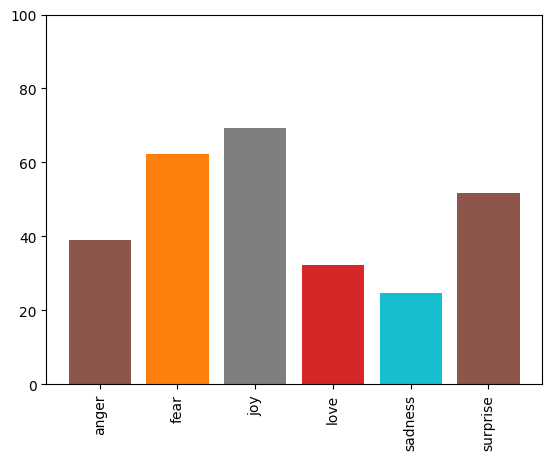

In [ ]:
fig, ax = plt.subplots()
for key , value in zip(encoded_dict.keys(),full):
    print(key,value)
    for i in range(0,6):
      ax.bar(key, value)
      ax.set_ylim(0, 100)
      ax.set_xticklabels(encoded_dict, rotation=90)
plt.show()

In [ ]:
from tabulate import tabulate


table_data = []
for key , value in zip(encoded_dict.keys(),full):
  table_data.append([key,value])

table_headers = ["Label", "Value"]
table = tabulate(table_data, headers=table_headers, tablefmt="pipe")
print(table)

| Label    |   Value |
|:---------|--------:|
| anger    | 39.0153 |
| fear     | 62.3087 |
| joy      | 69.3503 |
| love     | 32.2314 |
| sadness  | 24.6346 |
| surprise | 51.6161 |
